First five rows of data:
    symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  st

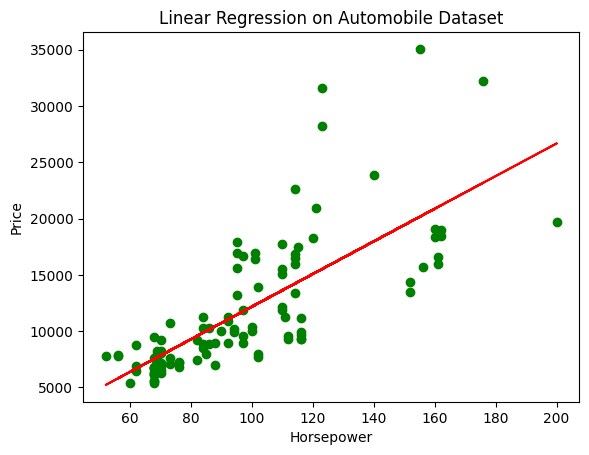

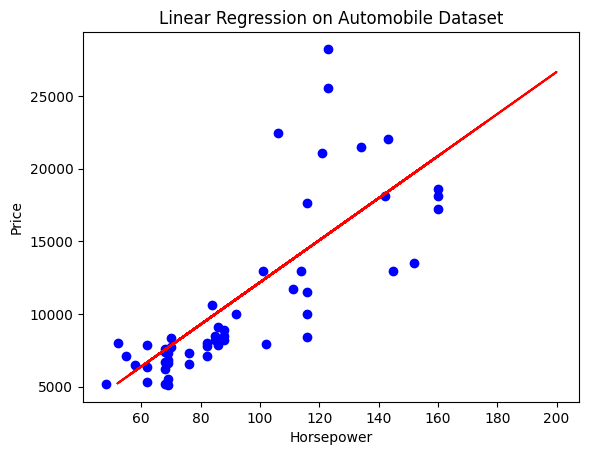

Coefficients: [144.83504144]
Intercept: -2304.211138408724
Mean Squared Error: 13140343.537664512
Coefficient of Determination (R^2 Score): 0.5999408960557353


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the Automobile dataset (assumes you have downloaded 'Automobile_data.csv' from Kaggle)
auto_data = pd.read_csv('/content/Automobile_data.csv')
print("First five rows of data:\n", auto_data.head())

# Handle missing values (e.g., replace '?' with NaN and drop rows with NaN values)
auto_data.replace('?', np.nan, inplace=True)
auto_data.dropna(inplace=True)

# Convert data types
auto_data['horsepower'] = auto_data['horsepower'].astype(float)
auto_data['price'] = auto_data['price'].astype(float)

# Select a feature (e.g., Horsepower) and the target variable (Price)
X = auto_data[['horsepower']].values  # Horsepower of the car
y = auto_data['price'].values  # Price of the car

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

# Create and train the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict and plot
y_pred = regressor.predict(X_test)
X_pred = regressor.predict(X_train)

plt.scatter(X_train, y_train, color="green")
plt.plot(X_train, X_pred, color="red")
plt.title("Linear Regression on Automobile Dataset")
plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.show()

plt.scatter(X_test, y_test, color="blue")
plt.plot(X_train, X_pred, color="red")
plt.title("Linear Regression on Automobile Dataset")
plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.show()

# Print the coefficients and evaluation metrics
print('Coefficients:', regressor.coef_)
print('Intercept:', regressor.intercept_)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Coefficient of Determination (R^2 Score):', r2_score(y_test, y_pred))
